In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [2]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9xkhgts2s6-1.zip

--2021-09-27 15:37:06--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/9xkhgts2s6-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.44.162
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.44.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3745528792 (3.5G) [application/octet-stream]
Saving to: ‘9xkhgts2s6-1.zip’

9xkhgts2s6-1.zip    100%[===================>]   3.49G  29.1MB/s    in 2m 7s   

2021-09-27 15:39:13 (28.2 MB/s) - ‘9xkhgts2s6-1.zip’ saved [3745528792/3745528792]



In [3]:
%%capture
!unzip 9xkhgts2s6-1.zip

In [4]:
!mkdir Dataset

In [5]:
image_directory='Dataset/'

no_covid_images=os.listdir(image_directory+ 'Normal/')
yes_covid_images=os.listdir(image_directory+ 'COVID-19/')

dataset=[]
label=[]

INPUT_SIZE=64

In [6]:
for i , image_name in tqdm(enumerate(no_covid_images)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'Normal/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in tqdm(enumerate(yes_covid_images)):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'COVID-19/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

3270it [02:16, 23.99it/s]
1281it [01:01, 20.77it/s]


In [7]:
dataset=np.array(dataset)
label=np.array(label)

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

y_train=tf.keras.utils.to_categorical(y_train , num_classes=2)
y_test=tf.keras.utils.to_categorical(y_test , num_classes=2)

In [8]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [9]:
model.layers

In [10]:
len(model.layers)

15

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [13]:
history = model.fit(x_train, y_train, 
batch_size=32, 
verbose=1, epochs=100, 
validation_data=(x_test, y_test),
shuffle=False)

Epoch 1/100
114/114 [==============================] - 34s 17ms/step - loss: 0.2999 - accuracy: 0.8569 - val_loss: 0.1038 - val_accuracy: 0.9704
Epoch 2/100
114/114 [==============================] - 1s 12ms/step - loss: 0.1229 - accuracy: 0.9624 - val_loss: 0.0792 - val_accuracy: 0.9748
Epoch 3/100
114/114 [==============================] - 1s 12ms/step - loss: 0.1077 - accuracy: 0.9670 - val_loss: 0.0730 - val_accuracy: 0.9726
Epoch 4/100
114/114 [==============================] - 1s 12ms/step - loss: 0.0959 - accuracy: 0.9739 - val_loss: 0.0765 - val_accuracy: 0.9693
Epoch 5/100
114/114 [==============================] - 1s 12ms/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0620 - val_accuracy: 0.9780
Epoch 6/100
114/114 [==============================] - 1s 12ms/step - loss: 0.0671 - accuracy: 0.9797 - val_loss: 0.0583 - val_accuracy: 0.9791
Epoch 7/100
114/114 [==============================] - 1s 12ms/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0564 - val_accuracy

In [14]:
%%time
print("Evaluating on test data ....")
results = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluating on test data ....
29/29 [==============================] - 0s 6ms/step - loss: 0.1295 - accuracy: 0.9923
test loss, test acc: [0.1294766515493393, 0.9923161268234253]
CPU times: user 232 ms, sys: 77.2 ms, total: 309 ms
Wall time: 435 ms


In [15]:
history.history

{'accuracy': [0.8568681478500366,
  0.9623626470565796,
  0.9670329689979553,
  0.973901093006134,
  0.9747252464294434,
  0.9796703457832336,
  0.9821428656578064,
  0.9799450635910034,
  0.9813186526298523,
  0.9837912321090698,
  0.9854395389556885,
  0.9837912321090698,
  0.9851648211479187,
  0.9876373410224915,
  0.9903846383094788,
  0.9931318759918213,
  0.9925824403762817,
  0.9947802424430847,
  0.9936813116073608,
  0.9939560294151306,
  0.9945054650306702,
  0.9958791136741638,
  0.9942307472229004,
  0.995604395866394,
  0.9969780445098877,
  0.9989010691642761,
  0.9986263513565063,
  0.9983516335487366,
  0.9969780445098877,
  0.9980769157409668,
  0.9980769157409668,
  0.9986263513565063,
  1.0,
  0.9994505643844604,
  0.9997252821922302,
  1.0,
  1.0,
  1.0,
  0.9964285492897034,
  0.9975274801254272,
  1.0,
  0.9969780445098877,
  0.9967032670974731,
  0.9994505643844604,
  0.9972527623176575,
  0.9920329451560974,
  0.9997252821922302,
  1.0,
  1.0,
  0.9997252821922

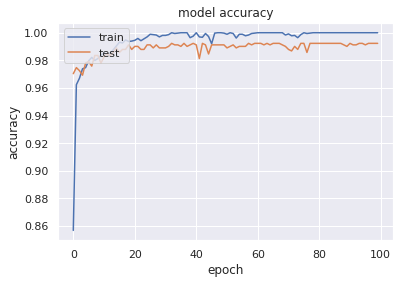

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

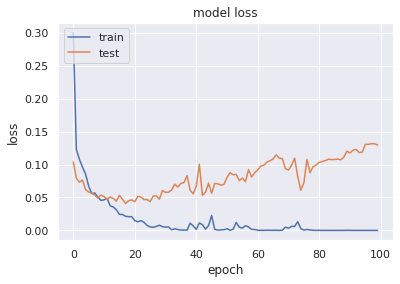

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
%%time
model.predict(x_train)

CPU times: user 527 ms, sys: 133 ms, total: 660 ms
Wall time: 676 ms


array([[1.0000000e+00, 2.0900892e-35],
       [1.0000000e+00, 3.2049299e-26],
       [1.0000000e+00, 1.8487193e-25],
       ...,
       [1.0000000e+00, 4.8289534e-32],
       [1.0000000e+00, 1.3689728e-29],
       [1.0000000e+00, 4.1613183e-28]], dtype=float32)

In [19]:
%%time
y_pred = model.predict(x_test)

CPU times: user 155 ms, sys: 14.6 ms, total: 170 ms
Wall time: 226 ms


In [20]:
Y_pred = np.argmax(y_pred, axis=1)

In [21]:
Y_test = np.argmax(y_test, axis=1)

In [22]:
Y_test  

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [23]:
Y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [24]:
%%time
result = model.predict(x_test[[0]])

CPU times: user 88.5 ms, sys: 926 µs, total: 89.5 ms
Wall time: 115 ms


In [25]:
cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[678   3]
 [  4 226]]
Accuracy :  0.9923161361141603
Sensitivity :  0.9955947136563876
Specificity :  0.9826086956521739


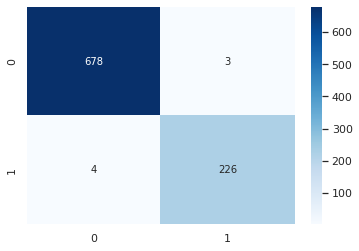

In [26]:
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap="Blues", annot=True,fmt="d")

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names = ['COVID', 'NORMAL']))

              precision    recall  f1-score   support

       COVID       0.99      1.00      0.99       681
      NORMAL       0.99      0.98      0.98       230

    accuracy                           0.99       911
   macro avg       0.99      0.99      0.99       911
weighted avg       0.99      0.99      0.99       911



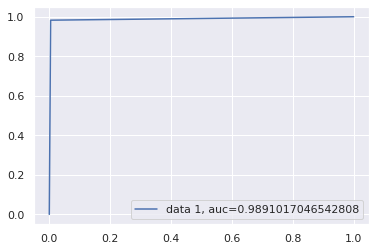

In [28]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [29]:
!pip install plot_metric

In [30]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(Y_test, Y_pred, labels=["COVID", "Normal"])

(array([0.25246981, 0.98689956, 1.        ]),
 array([1.       , 0.9826087, 0.       ]),
 array([0, 1]))

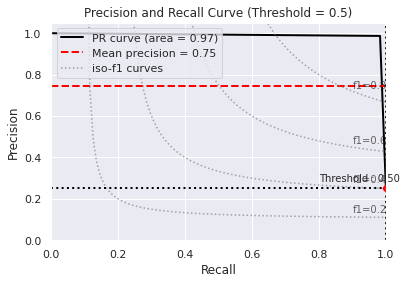

In [31]:
bc.plot_precision_recall_curve()

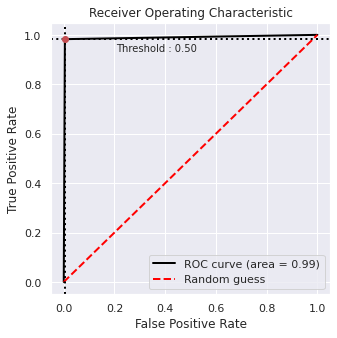

In [32]:
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

,True Class,Predicted Proba,Predicted Type,Predicted Class
0,0,0,TN,COVID
1,1,1,TP,Normal
2,0,0,TN,COVID
3,0,0,TN,COVID
4,0,0,TN,COVID
...,...,...,...,...
906,1,1,TP,Normal
907,0,0,TN,COVID
908,0,0,TN,COVID
909,0,0,TN,COVID


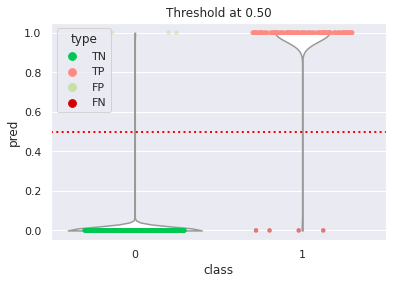

In [33]:
bc.plot_class_distribution()

array([[678,   3],
       [  4, 226]])

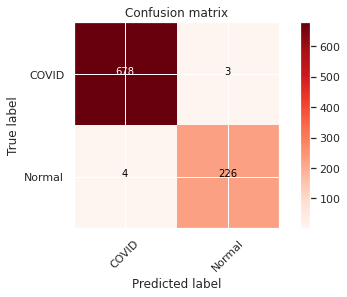

In [34]:
bc.plot_confusion_matrix()

array([[0.99559471, 0.00440529],
       [0.0173913 , 0.9826087 ]])

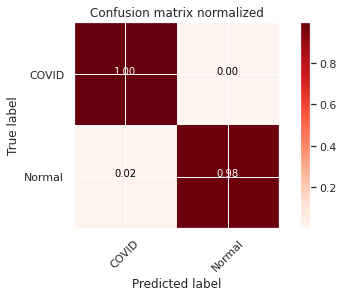

In [35]:
bc.plot_confusion_matrix(normalize=True)

In [36]:
bc.print_report()

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

       COVID       0.99      1.00      0.99       681
      Normal       0.99      0.98      0.98       230

    accuracy                           0.99       911
   macro avg       0.99      0.99      0.99       911
weighted avg       0.99      0.99      0.99       911



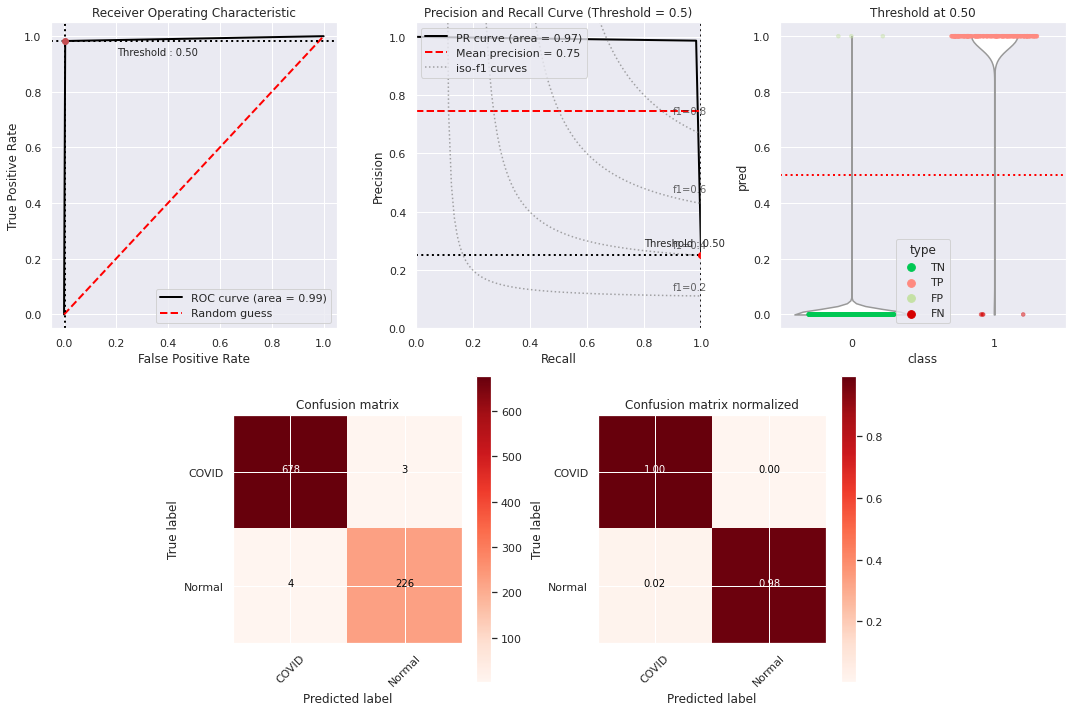

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

       COVID       0.99      1.00      0.99       681
      Normal       0.99      0.98      0.98       230

    accuracy                           0.99       911
   macro avg       0.99      0.99      0.99       911
weighted avg       0.99      0.99      0.99       911



In [37]:
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()